# Scraping HKEX HSI Daily option report
Daily Market Report (Latest)<BR>
https://www.hkex.com.hk/eng/stat/dmstat/dayrpt/dmreport8.htm

In [1]:
import pandas as pd
import numpy as np
import datetime
import requests
from bs4 import BeautifulSoup as bs
import plotly.express as px

#### Scraping HKEX HSI Daily option report on 2025-08-29
https://www.hkex.com.hk/eng/stat/dmstat/dayrpt/hsio250829.htm

In [2]:
url = 'https://www.hkex.com.hk/eng/stat/dmstat/dayrpt/hsio250829.htm'

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

#requests.get(url, headers=headers)

In [3]:
try:
    hkex_resp = requests.get(url, headers=headers)
    if hkex_resp.status_code == 200:
        print('Connect successfully!')
        hkex = bs(hkex_resp.content, 'html.parser')
    else:
        print("Connect failed. Status code:",hkex_resp.status_code)
except Exception as e:
    print('Failed to connect. ', e)

Connect successfully!


In [4]:
# Slicing TOP 10 TRADED report
top10 = str(hkex.pre).split('CHANGE')[1].split('Hang Seng')[0].split('\r\n')
top10

['',
 'C SEP-25      26000             765       215   19       262       184      1848       +26',
 'P SEP-25      23200             595        82   21        83        65       786        +1',
 'P SEP-25      23000             532        64   21        71        53       748        +1',
 'C SEP-25      25600             383       312   18       380       265       448       +35',
 'C SEP-25      25800             366       260   19       316       226       514       +32',
 'C SEP-25      25400             364       375   18       460       324       445       +41',
 'P SEP-25      24000             357       191   19       202       149       662       -14',
 'P SEP-25      24200             326       236   19       257       187       463       -19',
 'C SEP-25      26200             298       178   19       217       156       834       +21',
 'P SEP-25      24800             279       429   18       488       362       476       -43',
 '',
 '']

In [5]:
o_type, contract, strike, volume, oqpClose, iv, dayHi, dayLow, openInterest, oqpChange = [],[],[],[],[],[],[],[],[],[]

for row in top10:
    if not row == '':
        col = row.split()
        o_type.append( col[0] )
        contract.append( col[1] )
        strike.append( str(col[2]) )
        volume.append( int(col[3]) )
        oqpClose.append( int(col[4]) )
        iv.append( int(col[5]) )
        dayHi.append( int(col[6]) )
        dayLow.append( int(col[7]) )
        openInterest.append( int(col[8]) )
        oqpChange.append( int(col[9]) )

df_top10 = pd.DataFrame(data={
    'OptionType':o_type, 'Contract':contract, 'Strike':strike, 
    'Volume':volume, 'OQPclose':oqpClose, 'IV':iv, 'DayHi':dayHi, 
    'DayLow':dayLow, 'OpenInterest':openInterest, 'OQPchange':oqpChange
        },  )
df_top10

,OptionType,Contract,Strike,Volume,OQPclose,IV,DayHi,DayLow,OpenInterest,OQPchange
0,C,SEP-25,26000,765,215,19,262,184,1848,26
1,P,SEP-25,23200,595,82,21,83,65,786,1
2,P,SEP-25,23000,532,64,21,71,53,748,1
3,C,SEP-25,25600,383,312,18,380,265,448,35
4,C,SEP-25,25800,366,260,19,316,226,514,32
5,C,SEP-25,25400,364,375,18,460,324,445,41
6,P,SEP-25,24000,357,191,19,202,149,662,-14
7,P,SEP-25,24200,326,236,19,257,187,463,-19
8,C,SEP-25,26200,298,178,19,217,156,834,21
9,P,SEP-25,24800,279,429,18,488,362,476,-43


#### `O.Q.P. - OFFICIAL QUOTATION PRICE`
#### `*ALL COMBO VS. COMBO TRANSACTIONS ARE EXCLUDED`

In [6]:
df_top10.OptionType = np.where(df_top10.OptionType == 'C', 'Call', 'Put')

In [7]:
df_top10.sort_values('Strike', inplace=True)

In [8]:
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2 to 8
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OptionType    10 non-null     object
 1   Contract      10 non-null     object
 2   Strike        10 non-null     object
 3   Volume        10 non-null     int64 
 4   OQPclose      10 non-null     int64 
 5   IV            10 non-null     int64 
 6   DayHi         10 non-null     int64 
 7   DayLow        10 non-null     int64 
 8   OpenInterest  10 non-null     int64 
 9   OQPchange     10 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 880.0+ bytes


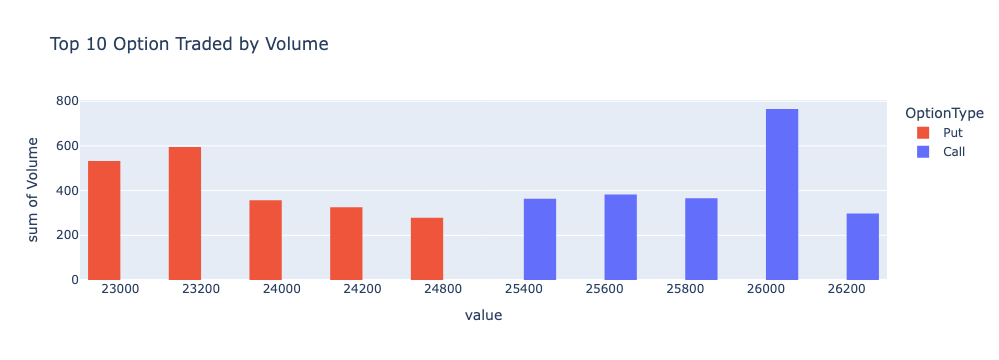

In [9]:
fig = px.histogram(df_top10, x=["Strike"], y="Volume", barmode='group', color='OptionType', height=400,
             color_discrete_map={ 'Put': '#ef553b',  'Call': '#636efa'}, title='Top 10 Option Traded by Volume' )
fig.show()

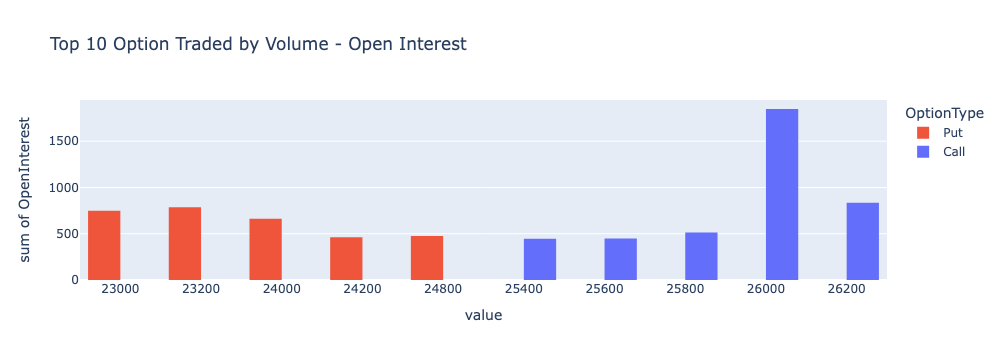

In [10]:
fig = px.histogram(df_top10, x=["Strike"], y="OpenInterest", barmode='group', color='OptionType', height=400,
             color_discrete_map={ 'Put': '#ef553b',  'Call': '#636efa'}, title='Top 10 Option Traded by Volume - Open Interest' )
fig.show()

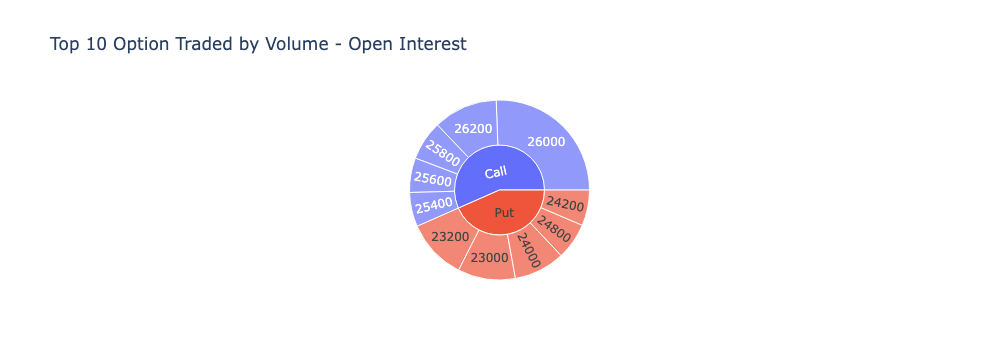

In [11]:
fig = px.sunburst(df_top10, path=['OptionType', 'Strike'], values='OpenInterest', height=600,
                  title='Top 10 Option Traded by Volume - Open Interest' )
fig.show()

In [12]:
help(requests.get)

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response

